<a href="https://colab.research.google.com/github/rudrakant22sep/EVA/blob/Session_4/Assignment_4_3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Taking Assignment 3 final Code "Assignment_4_2nd_Draft.ipynb" as I/p here*** 

- I/p here has:-
- 28x28x1 ---> 3x3x10 | 3x3x16 | 3x3x16 | MP | 1x1x16 | 3x3x16 | 3x3x16 | 1x1x16 | 3x3x16 | 1x1x10 --> O/p Layer -- 5x5x10 -- activation
-- BatchNormalization & DropOut (of 0.1) added to all Convolution Layer, EXCEPT the prediction Layer
-- added ValidationAccuracy in the MODEL.FIT for the X & Y test data
- Total params: 14,588
-- Trainable params: 14,324
-- Non-trainable params: 264
- [0.02869177752629621, 0.9913]

**CHANGE # 1**
- increase the EPOCH Count in Model.fit from 10 to 20
-- [0.026656645488750654, 0.991]



**CHANGE # 2**
- setting EPOCH back to 10 and changing Batch_Size to 64, 256, 512
-- with 64 batch_size, [0.028849668405984994, 0.9913]
-- with 128 batch_size, [0.026942020520509688, 0.9906]
-- with 256 batch_size, [0.02794412565836683, 0.9911]
-- with 512 batch_size, [0.033558009410300293, 0.9906]

==> SO, increasing BATCH_Size has not had had any predictable improvement

**CHANGE # 3**
- setting Epoch 20, batch size 512, ==> 99.21%
- E = 20, B_S = 256, ==> 99.22%
- E = 20, B_S = 128, ==> 99.26%
- E = 20, B_S = 64,   ==> 99.38%
- E = 25, B_S = 64,   ==> 99.35%
- E = 25, B_S = 128, ==> 99.23%
- ***E = 30, B_S = 64,   ==> 99.42% <<<<<<<< Achieved   >= 99.40% accuracy***

- E = 30, B_S = 64, droprate = 0.15, ==> 99.28%
- E = 30, B_S = 64, droprate = 0.11, ==> 99.38%
- E = 30, B_S = 64, droprate = 0.08, ==> 99.24%

**HENCE, setting the changes back 0.1 as dropout, E = 30, and BS = 64**




In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


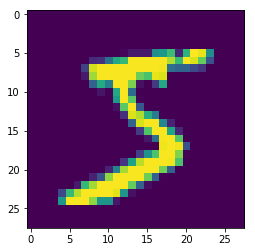

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()
droprate=0.08


# Initial Block
##Input shape (28 X 28 X 1) 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
            # RF  (3 X 3), O/p: (26 X 26 X 10)
model.add(BatchNormalization())
model.add(Dropout(droprate))


# Convolution Block
model.add(Convolution2D(16,3,3, activation = 'relu'))  # RF: 5X5, o/p: 24X24X16
model.add(BatchNormalization())
model.add(Convolution2D(16,3,3, activation = 'relu')) # RF: 7x7, o/p: 22x22x16
model.add(BatchNormalization())
model.add(Dropout(droprate))


# Transition Block
model.add(MaxPooling2D(2,2))                          # RF: 14x14, o/p: 11x11x16
model.add(Convolution2D(16,1,1, activation = 'relu')) # RF: 14x14, o/p: 11x11x16
model.add(BatchNormalization())
model.add(Dropout(droprate))


# Convolution Block
model.add(Convolution2D(16,3,3, activation = 'relu'))  # RF:16x16, o/p: 9x9x16
model.add(BatchNormalization())
model.add(Dropout(droprate))
model.add(Convolution2D(16,3,3, activation = 'relu')) # RF:18x18, o/p: 7x7x16
model.add(BatchNormalization())
model.add(Dropout(droprate))


# Transition Block
model.add(Convolution2D(16, 1, 1, activation='relu'))  # RF: 18x18, o/p: 7x7x16
model.add(BatchNormalization())
model.add(Dropout(droprate))


# Convolution Block
model.add(Convolution2D(16,3,3, activation = 'relu'))  # RF:20x20, o/p: 5x5x16
model.add(BatchNormalization())
model.add(Dropout(droprate))


# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu'))  # RF: 20x20, o/p: 5x5x10
model.add(BatchNormalization())
model.add(Dropout(droprate))


# O/P layer
model.add(Convolution2D(10, 5,5))                      # RF: 20x20, o/p: 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))



W0623 15:19:30.968899 139659383551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
W0623 15:19:31.030626 139659383551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 15:19:31.035161 139659383551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 15:19:31.137803 139659383551872 deprecation_wrapper.py:119] From /usr/local/lib/pytho

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0623 15:19:36.788532 139659383551872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)
model.fit(X_train, Y_train, batch_size=64, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

W0623 15:19:37.338567 139659383551872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 56s 932us/step - loss: 0.3509 - acc: 0.8899 - val_loss: 0.0710 - val_acc: 0.9769
Epoch 2/30
60000/60000 [==============================] - 42s 697us/step - loss: 0.0911 - acc: 0.9710 - val_loss: 0.0580 - val_acc: 0.9810
Epoch 3/30
60000/60000 [==============================] - 43s 716us/step - loss: 0.0689 - acc: 0.9786 - val_loss: 0.0426 - val_acc: 0.9859
Epoch 4/30
60000/60000 [==============================] - 42s 698us/step - loss: 0.0556 - acc: 0.9821 - val_loss: 0.0405 - val_acc: 0.9868
Epoch 5/30
60000/60000 [==============================] - 41s 691us/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.0303 - val_acc: 0.9900
Epoch 6/30
60000/60000 [==============================] - 42s 705us/step - loss: 0.0447 - acc: 0.9859 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 44s 729us/step - loss: 0.0411 - acc: 0.9869 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.0227820855637372, 0.9938]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.62684167e-12 7.69220954e-09 5.03689312e-10 9.34924405e-09
  3.29142150e-13 7.19837731e-12 8.26925550e-16 1.00000000e+00
  1.32216972e-11 1.06264002e-08]
 [4.39046431e-07 1.47337150e-05 9.99984503e-01 3.41951036e-08
  1.47561074e-08 1.41536999e-11 3.28543138e-07 7.62683805e-11
  4.95786634e-10 3.67253519e-11]
 [1.04210356e-10 1.00000000e+00 9.80365233e-11 1.91389682e-11
  1.90992129e-08 5.14237090e-11 1.21142332e-10 2.61410555e-08
  1.73803638e-10 1.41069767e-10]
 [9.99763191e-01 4.81867983e-11 3.15424509e-09 3.04338050e-06
  3.13270277e-07 6.07332538e-07 2.19247857e-04 3.64633657e-09
  2.44979788e-07 1.33253434e-05]
 [7.35414808e-14 1.40958079e-11 2.23877801e-13 2.87789688e-16
  1.00000000e+00 3.41493354e-13 8.34181075e-12 3.93070168e-12
  1.76751148e-11 1.90681915e-09]
 [2.01201139e-11 1.00000000e+00 4.11142370e-10 1.28190828e-12
  1.80194899e-08 2.71470064e-12 8.92637353e-12 2.97457436e-08
  2.48944042e-11 1.72778028e-10]
 [2.03676603e-10 6.86428962e-07 2.08134746e-10 4.00752131e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored